# Capstone Project
## Student: Yuri Mendonca Ribeiro - 2020347
## Lecture: Dr. Muhammad Iqbal


GitHub Repository: https://github.com/YWRCCT/Capstone_YuriRibeiro_2020347

### Import Required Libraries
The code below imports the necessary Python Libraris for data manipulation like pandas and numpy, data visualisation like seaborn, matplolib and plotly and machine learning models from sklearn.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### 2. Load the Dataset
Dataset source: https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset

Prasad,Arvind and Chandra,Shalini. (2024). PhiUSIIL Phishing URL (Website). UCI Machine Learning Repository. https://doi.org/10.1016/j.cose.2023.103545.

License: This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

In [2]:
phishing_df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')

### 3. Check the Shape of the Dataset

In [3]:
phishing_df.shape

(235795, 56)

### 4.  Preview the Dataset

In [3]:
phishing_df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [4]:
phishing_df.head(10)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
5,23107.txt,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,...,0,0,1,35,1,11,86,0,14,1
6,23034.txt,https://www.saffronart.com,25,www.saffronart.com,18,0,com,100.0,1.000000,0.522907,...,0,0,1,32,4,14,44,2,17,1
7,696732.txt,https://www.nerdscandy.com,25,www.nerdscandy.com,18,0,com,100.0,1.000000,0.522907,...,0,0,1,24,2,22,36,0,15,1
8,739255.txt,https://www.hyderabadonline.in,29,www.hyderabadonline.in,22,0,in,100.0,1.000000,0.005084,...,0,0,1,71,4,9,40,1,317,1
9,14486.txt,https://www.aap.org,18,www.aap.org,11,0,org,100.0,1.000000,0.079963,...,0,0,1,10,1,12,173,6,65,1


In [5]:
phishing_df.tail(10)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235785,429092.txt,https://www.virginiakraljevic.com,32,www.virginiakraljevic.com,25,0,com,100.000000,1.000000,0.522907,...,1,0,1,4,9,12,17,1,1,1
235786,406164.txt,https://www.chilconference.org,29,www.chilconference.org,22,0,org,100.000000,1.000000,0.079963,...,0,0,1,2,7,15,30,7,3,1
235787,424795.txt,https://www.indirekter-freistoss.de,34,www.indirekter-freistoss.de,27,0,de,100.000000,0.550000,0.032650,...,0,0,0,3,6,12,320,0,348,1
235788,632917.txt,https://www.karibpan.com,23,www.karibpan.com,16,0,com,100.000000,1.000000,0.522907,...,1,0,1,21,3,22,31,0,8,1
235789,179093.txt,https://www.life-in-ecuador.com,30,www.life-in-ecuador.com,23,0,com,100.000000,0.533333,0.522907,...,0,0,1,43,1,16,42,0,44,1
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,...,0,0,1,21,6,18,256,0,261,1


In [6]:
phishing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [5]:
phishing_df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [6]:
phishing_df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

### 5. Check the unique values from 'Label' and display a countplot

In [8]:
np.unique(phishing_df['label'], return_counts=True) # count the unique values

(array([0, 1], dtype=int64), array([100945, 134850], dtype=int64))

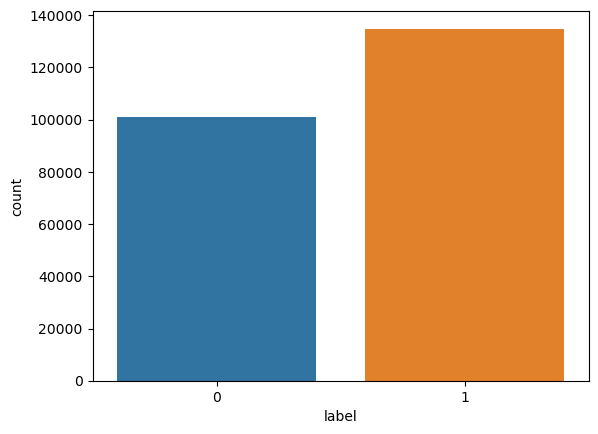

In [9]:
# display the count of values on label where 0 corresponds to a legitimate URL and 1 to a phishing URL
sns.countplot(x = phishing_df['label']); 

### 6.  Data Processing

* Checking missins values and data inconsistencies.
* Drop the categorical columns FILENAME, URL, DOMAIN and TITLE
* Separate features and target variable
* Apply One-hot encoding for the 'TLD' column
* Apply Standardisation
* Splitting the data into training and testing sets



In [12]:
# check missing values
phishing_df.isnull().count

<bound method DataFrame.count of         FILENAME    URL  URLLength  Domain  DomainLength  IsDomainIP    TLD  \
0          False  False      False   False         False       False  False   
1          False  False      False   False         False       False  False   
2          False  False      False   False         False       False  False   
3          False  False      False   False         False       False  False   
4          False  False      False   False         False       False  False   
...          ...    ...        ...     ...           ...         ...    ...   
235790     False  False      False   False         False       False  False   
235791     False  False      False   False         False       False  False   
235792     False  False      False   False         False       False  False   
235793     False  False      False   False         False       False  False   
235794     False  False      False   False         False       False  False   

        URLSimilar

In [11]:
# Check for data inconsistencies
print(phishing_df.duplicated().sum())

0


In [20]:
# drop FILENAME, URL, DOMAIN and TITLE
columns_to_drop = ['FILENAME', 'URL', 'Domain', 'Title']

for column in columns_to_drop:
    if column in phishing_df.columns:
        phishing_df = phishing_df.drop(columns=[column])

In [21]:
# Separate features and target variable
X_df = phishing_df.drop('label', axis=1)
y_df = phishing_df['label']

In [22]:
# Using One-hot encoding for the 'TLD' column
categorical_col = ['TLD']
ohe = OneHotEncoder(handle_unknown='ignore')

# Create a temporary DataFrame with just the 'TLD' column
temp_df = X_df[categorical_col]

# Perform one-hot encoding
encoded_temp_df = pd.DataFrame(ohe.fit_transform(temp_df).toarray())

# Assign new column names to the encoded columns
encoded_temp_df.columns = ohe.get_feature_names_out(categorical_col)

# Drop the original 'TLD' column and concatenate with the encoded columns
X_df = pd.concat([X_df.drop(categorical_col, axis=1), encoded_temp_df], axis=1)


In [30]:
# # Standardisation
scaler = StandardScaler()
X_df = scaler.fit_transform(X_df)

In [31]:
X_df[1]

array([-2.80124826e-01, -5.97806918e-01, -5.20872446e-02,  7.44382492e-01,
       -8.25554856e-01, -9.05197078e-01, -5.23283217e-01, -1.27465192e+00,
       -2.74153546e-01, -4.53994590e-02, -1.32501749e-02, -3.62646680e-02,
       -3.58501996e-01, -1.01322710e+00, -1.58245413e-01, -4.03629267e-01,
       -6.65886000e-02, -1.51947802e-01, -2.99549162e-02, -9.64390628e-02,
        7.31352290e-01,  5.27021429e-01, -1.53189806e-01, -2.23949753e-02,
        4.01358235e-01,  1.09188191e-01,  6.92222983e-02,  1.32823388e+00,
        1.65884602e+00, -1.28965374e+00, -3.92409792e-01, -2.04408032e-01,
       -8.86734849e-01, -5.72956591e-02, -2.75683277e-01, -2.14502393e-01,
        1.09098262e+00,  1.18899395e+00, -7.79228087e-01, -3.37507679e-01,
       -3.81565769e-01, -5.57339695e-01, -1.55042072e-01,  1.02681021e+00,
        3.01269555e-01,  3.56220943e-02, -1.13046300e-01, -1.47555216e-01,
       -1.34778119e-01,  1.04167247e+00, -2.05936641e-03, -2.91239008e-03,
       -1.00892859e-02, -

In [32]:
# Split the data into train and test sets in 15% was the best result
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.15, random_state=0)

In [33]:
X_train.shape, y_train.shape

((200425, 745), (200425,))

In [34]:
X_test.shape, y_test.shape

((35370, 745), (35370,))

### 7. Model Training and Evaluation
* Logistic Regression Model
* Random Forest Model
* Support Vector Machines (SVM) model

Evaluation of the models applying accuracy score and confusion matrix



#### Logistic Regression model - 99.98%

In [37]:
# Train a logistic regression model
logistic_rg = LogisticRegression()
logistic_rg.fit(X_train, y_train)

# Check the model accuracy
accuracy = logistic_rg.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.999830364715861


In [38]:
# predictions
prediction_rg = logistic_rg.predict(X_test)
prediction_rg

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [39]:
y_test.array

<PandasArray>
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
 ...
 0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Length: 35370, dtype: int64

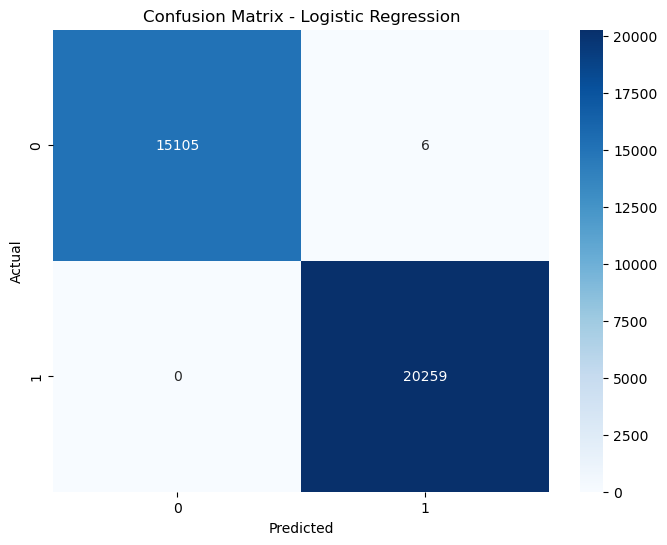

In [40]:
# confusion matrix
cm = confusion_matrix(y_test, prediction_rg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [41]:
# Check the model accuracy - Logistic Regression
print(classification_report(y_test, prediction_rg))
accuracy_score(y_test, prediction_rg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15111
           1       1.00      1.00      1.00     20259

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370



0.999830364715861

#### Random Forest model - 99.99%

In [52]:
# n_estimators = number of trees
# make test and compare the results - 10 trees = 99.98%, 100 trees = 99.99% - check confusion matrix
random_forest_phishing = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
random_forest_phishing.fit(X_train, y_train)

# Check the model accuracy
accuracy = random_forest_phishing.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.9999717274526435


In [53]:
prediction_forest = random_forest_phishing.predict(X_test)
prediction_forest

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [54]:
y_test.array

<PandasArray>
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
 ...
 0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Length: 35370, dtype: int64

In [55]:
# Check the model accuracy - Random Forest
print(classification_report(y_test, prediction_forest))
accuracy_score(y_test, prediction_forest)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15111
           1       1.00      1.00      1.00     20259

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370



0.9999717274526435

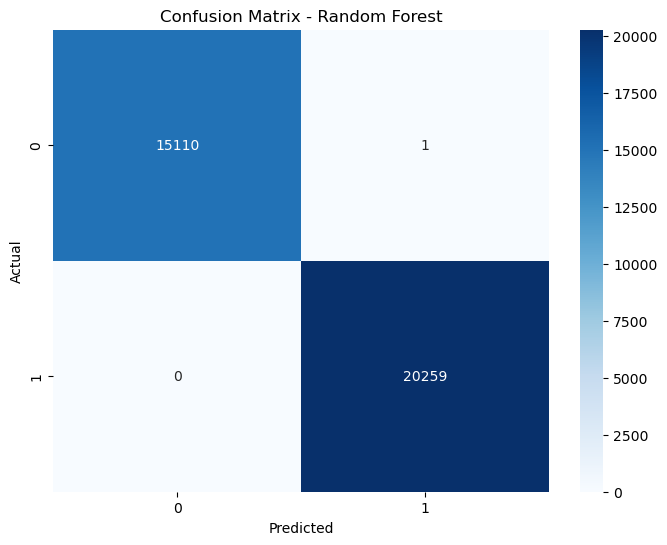

In [56]:
cm = confusion_matrix(y_test, prediction_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### SVM model - 99.98%

In [59]:
# Kernel = linear
svm_phishing = SVC(kernel='linear', random_state=1, C = 2.0) 
svm_phishing.fit(X_train, y_train )

# Check the model accuracy
accuracy = svm_phishing.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.999830364715861


In [43]:
prediction_SVM = svm_phishing.predict(X_test)
prediction_SVM

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [44]:
y_test.array

<PandasArray>
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
 ...
 0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
Length: 35370, dtype: int64

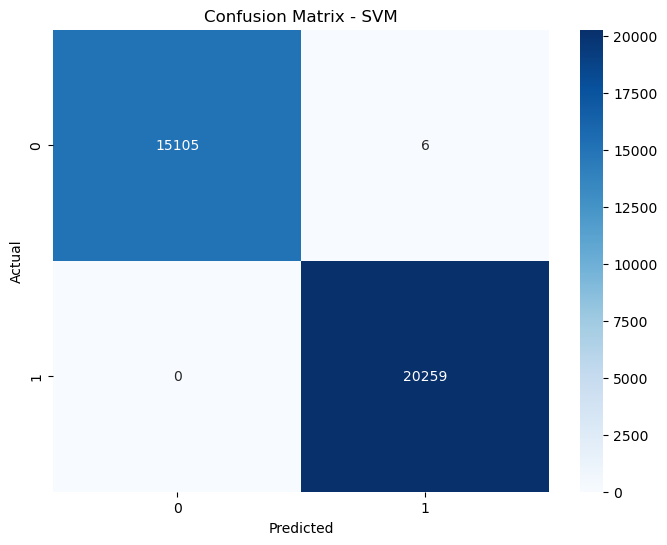

In [50]:
cm = confusion_matrix(y_test, prediction_SVM)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

In [47]:
# Check the model accuracy - SVM
print(classification_report(y_test, prediction_SVM))
accuracy_score(y_test, prediction_SVM)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15111
           1       1.00      1.00      1.00     20259

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370



0.999830364715861